In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
sns.set_style("darkgrid")

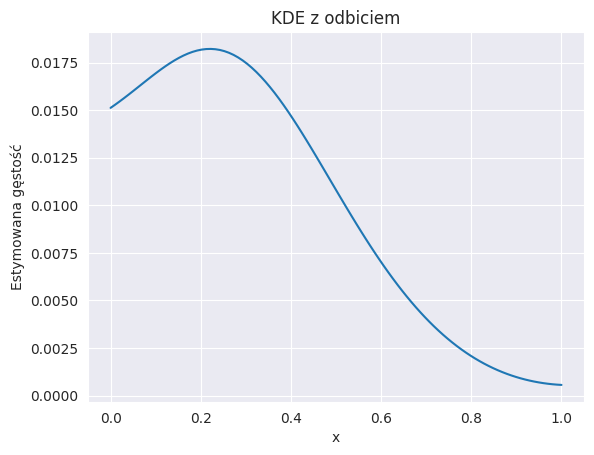

In [27]:
import numpy as np
from scipy.stats import gaussian_kde

# Przykładowe dane w przedziale [0, 1]
data = np.random.beta(a=2, b=5, size=1000)

# Metoda odbicia danych
data_reflected = np.concatenate([data, -data, 2 - data])

# KDE
kde = gaussian_kde(data_reflected)

# Estymacja gęstości w przedziale [0, 1]
x = np.linspace(0, 1, 100)
density = kde(x) + kde(-x) + kde(2 - x)

# Normalizacja do przedziału [0, 1]
density /= density.sum()

# Wynikowa gęstość
import matplotlib.pyplot as plt

plt.plot(x, density)
plt.title('KDE z odbiciem')
plt.xlabel('x')
plt.ylabel('Estymowana gęstość')
plt.show()


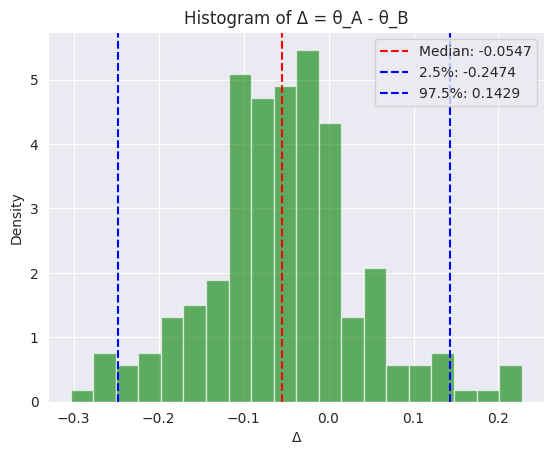

Mean of Δ: -0.0531
Variance of Δ: 0.0082
95% Confidence Interval for Δ: (-0.2474, 0.1429)


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Załóżmy, że mamy 200 symulacji dla theta_A i theta_B
# Przykładowe dane (w rzeczywistości pochodzące z symulacji)
np.random.seed(42)
theta_A_samples = np.random.beta(10, 30, 200)
theta_B_samples = np.random.beta(12, 28, 200)

# Obliczenie różnicy
delta_samples = theta_A_samples - theta_B_samples

# Statystyki różnicy
mean_delta = np.mean(delta_samples)
var_delta = np.var(delta_samples)
percentiles_delta = np.percentile(delta_samples, [2.5, 50, 97.5])

# Histogram różnicy
plt.hist(delta_samples, bins=20, density=True, alpha=0.6, color='g')
plt.title('Histogram of Δ = θ_A - θ_B')
plt.xlabel('Δ')
plt.ylabel('Density')
plt.axvline(x=percentiles_delta[1], color='red', linestyle='--', label=f'Median: {percentiles_delta[1]:.4f}')
plt.axvline(x=percentiles_delta[0], color='blue', linestyle='--', label=f'2.5%: {percentiles_delta[0]:.4f}')
plt.axvline(x=percentiles_delta[2], color='blue', linestyle='--', label=f'97.5%: {percentiles_delta[2]:.4f}')
plt.legend()
plt.show()

# Wyniki
print(f"Mean of Δ: {mean_delta:.4f}")
print(f"Variance of Δ: {var_delta:.4f}")
print(f"95% Confidence Interval for Δ: ({percentiles_delta[0]:.4f}, {percentiles_delta[2]:.4f})")


820
P(θ_A > θ_B) = 0.00202433
CI A: (0.1379, 0.1975) CI B: (0.0567, 0.1322)


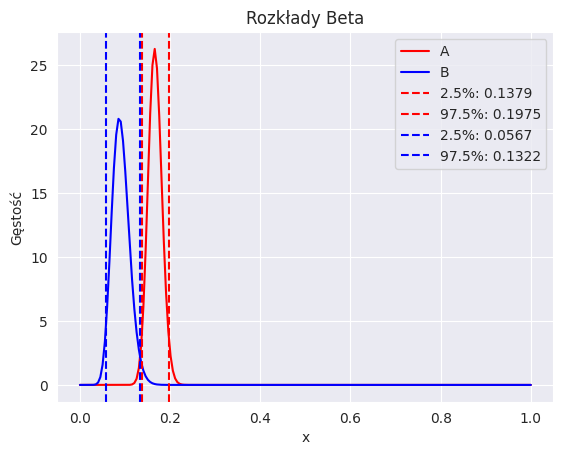

In [216]:
from scipy.stats import beta
from scipy.integrate import quad

def integrand(x, alpha_A, beta_A, alpha_B, beta_B):
    """
    Funkcja podcałkowa do obliczenia P(θ_A > θ_B + delta) numerycznie.
    """
    return beta.cdf(x, alpha_A, beta_A) * beta.pdf(x, alpha_B, beta_B)

def calculate_probability_greater_analytically(alpha_A, beta_A, alpha_B, beta_B, delta=0):
    """
    Oblicza prawdopodobieństwo, że θ_A > θ_B analitycznie.

    Args:
    - alpha_A, beta_A (float): Parametry rozkładu Beta dla θ_A.
    - alpha_B, beta_B (float): Parametry rozkładu Beta dla θ_B.

    Returns:
    - float: Prawdopodobieństwo, że θ_A > θ_B - delta, z dokładnością do dwóch miejsc po przecinku.
    """
    # Całkowanie numeryczne
    probability, _ = quad(integrand, delta, 1, args=(alpha_A, beta_A, alpha_B, beta_B), epsabs=0.001)
    # probability, _ = quad(integrand, 0, 1, args=(alpha_A, beta_A, alpha_B, beta_B), epsabs=0.001)
    
    # Zaokrąglanie do dwóch miejsc po przecinku
    return probability


# Przykład użycia:
k = 10
alpha_A, beta_A = 45*k, 55*k
alpha_B, beta_B = 50*k, 50*k
alpha_A, beta_A = 100, 500
alpha_B, beta_B = 20, 200 
s = alpha_A + alpha_B + beta_A + beta_B
print(s)
# Obliczenie prawdopodobieństwa
probability = calculate_probability_greater_analytically(alpha_A, beta_A, alpha_B, beta_B, 0.05)
print(f"P(θ_A > θ_B) = {probability:.8f}")

x = np.linspace(0, 1, 200)
density_a = beta.pdf(x, alpha_A, beta_A)
density_b = beta.pdf(x, alpha_B, beta_B)
plt.plot(x, density_a, label='A', color='red')
plt.plot(x, density_b, label='B', color='blue')

alpha = 0.05
ci_a_1 = beta.ppf(alpha/2, alpha_A, beta_A)
ci_a_2 = beta.ppf(1 - alpha/2, alpha_A, beta_A)
ci_b_1 = beta.ppf(alpha/2, alpha_B, beta_B)
ci_b_2 = beta.ppf(1 - alpha/2, alpha_B, beta_B)

print(f'CI A: ({ci_a_1:.4f}, {ci_a_2:.4f})', f'CI B: ({ci_b_1:.4f}, {ci_b_2:.4f})')
plt.axvline(x=ci_a_1, color='red', linestyle='--', label=f'2.5%: {ci_a_1:.4f}')
plt.axvline(x=ci_a_2, color='red', linestyle='--', label=f'97.5%: {ci_a_2:.4f}')
plt.axvline(x=ci_b_1, color='blue', linestyle='--', label=f'2.5%: {ci_b_1:.4f}')
plt.axvline(x=ci_b_2, color='blue', linestyle='--', label=f'97.5%: {ci_b_2:.4f}')

plt.legend()

plt.title('Rozkłady Beta')
plt.xlabel('x')
plt.ylabel('Gęstość')
plt.show()

In [60]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad, dblquad

# Parametry rozkładu beta dla X i Y
a_X, b_X = 4, 1
a_Y, b_Y = 1, 4

# Delta
delta = 0.05

# Funkcja gęstości prawdopodobieństwa dla zmiennych losowych X i Y
def f_X(x):
    return beta.pdf(x, a_X, b_X)

def f_Y(y):
    return beta.pdf(y, a_Y, b_Y)

# Funkcja podcałkowa dla prawdopodobieństwa P(X - Y > delta)
def integrand(y, delta):
    return lambda x: f_X(x) * f_Y(y) * (x > y + delta)

# Funkcja gęstości różnicy Z = X - Y
def integrand_for_quad(y, delta):
    result, _ = quad(integrand(y, delta), delta + y, 1)
    return result

# Całka podwójna - obliczenie prawdopodobieństwa
result, _ = quad(lambda y: integrand_for_quad(y, delta), 0, 1)

print(f"P(X - Y > {delta}) ≈ {result}")


P(X - Y > 0.5) ≈ 0.6982700892857142


In [214]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad

# Parametry rozkładu beta dla X i Y
k = 10
a_X, b_X = 10, 10
a_Y, b_Y = 50, 50
a_X, b_X = 100, 500
a_Y, b_Y = 20, 200 

# Delta
delta = 0

# Funkcja gęstości prawdopodobieństwa dla zmiennej losowej Y
def f_Y(y):
    return beta.pdf(y, a_Y, b_Y)

# Funkcja dystrybuanty dla zmiennej losowej X
def F_X(z):
    return beta.cdf(z, a_X, b_X)

# Funkcja podcałkowa
def integrand(y, delta):
    return f_Y(y) * (1 - F_X(y + delta))

def integrand_for_quad(y, delta, a_X, b_X, a_Y, b_Y):
    return beta.pdf(y, a_Y, b_Y) * (1 - beta.cdf(y + delta, a_X, b_X))
result, _ = quad(lambda y: integrand_for_quad(y, delta, a_X, b_X, a_Y, b_Y), 0, 1-delta) 

# Obliczenie całki
# result, _ = quad(lambda y: integrand(y, delta), 0, 1-delta)

print(f"P(X - Y > {delta}) ≈ {result}")


P(X - Y > 0) ≈ 0.9979756722636687


In [188]:
import itertools
a_X, b_X = 4, 1
a_Y, b_Y = 1, 4
wariaciones = list(itertools.permutations([a_Y+i for i in range(10)], 2))

# for w in wariaciones:

results=[]
for a_Y, b_Y in [[i, j ] for i in range(a_Y, a_Y+5) for j in range(b_Y, b_Y+5)]:
    result, _ = quad(lambda y: integrand_for_quad(y, delta, a_X, b_X, a_Y, b_Y), 0, 1-delta) 
    results.append(result)
    print(f"P(X - Y > {delta}) ≈ {result} {a_Y} {b_Y}")
print("Mean", np.mean(results))

P(X - Y > 0) ≈ 0.9857142857142857 1 4
P(X - Y > 0) ≈ 0.9920634920634923 1 5
P(X - Y > 0) ≈ 0.9952380952380948 1 6
P(X - Y > 0) ≈ 0.9969696969696973 1 7
P(X - Y > 0) ≈ 0.997979797979798 1 8
P(X - Y > 0) ≈ 0.9603174603174605 2 4
P(X - Y > 0) ≈ 0.9761904761904759 2 5
P(X - Y > 0) ≈ 0.9848484848484852 2 6
P(X - Y > 0) ≈ 0.9898989898989898 2 7
P(X - Y > 0) ≈ 0.9930069930069931 2 8
P(X - Y > 0) ≈ 0.9285714285714285 3 4
P(X - Y > 0) ≈ 0.9545454545454547 3 5
P(X - Y > 0) ≈ 0.9696969696969696 3 6
P(X - Y > 0) ≈ 0.979020979020979 3 7
P(X - Y > 0) ≈ 0.9850149850149852 3 8
P(X - Y > 0) ≈ 0.8939393939393938 4 4
P(X - Y > 0) ≈ 0.9292929292929292 4 5
P(X - Y > 0) ≈ 0.9510489510489507 4 6
P(X - Y > 0) ≈ 0.965034965034965 4 7
P(X - Y > 0) ≈ 0.9743589743589742 4 8
P(X - Y > 0) ≈ 0.8585858585858582 5 4
P(X - Y > 0) ≈ 0.9020979020979022 5 5
P(X - Y > 0) ≈ 0.93006993006993 5 6
P(X - Y > 0) ≈ 0.9487179487179482 5 7
P(X - Y > 0) ≈ 0.9615384615384615 5 8
Mean 0.960150516150516


In [191]:
0.5**5

0.03125

In [162]:
binomial_std = stats.binom.std(1, 0.2)
print(binomial_std)


0.4


In [14]:
stats.beta.std(1, 4), stats.beta.std(8, 12)

(0.16329931618554522, 0.10690449676496976)

In [176]:
0.5**5

0.03125

In [163]:
calculate_probability_greater_analytically(1, 1, 1, 1)*calculate_probability_greater_analytically(1, 1, 1, 2)*calculate_probability_greater_analytically(1, 1, 1, 3)

0.04166666666666665

In [162]:
calculate_probability_greater_analytically(1, 1, 1, 1)

0.49999999999999983

In [98]:
%%timeit
probability = calculate_probability_greater_analytically(alpha_A, beta_A, alpha_B, beta_B)
probability

14.1 ms ± 2.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


(array([ 0.05357143,  0.14285714,  0.39285714,  1.67857143,  2.83928571,
         6.83928571, 12.76785714, 16.25      , 25.64285714, 23.98214286,
        29.07142857, 23.44642857, 14.60714286, 11.08928571,  5.28571429,
         3.03571429,  0.91071429,  0.32142857,  0.16071429,  0.05357143]),
 array([0.25  , 0.2556, 0.2612, 0.2668, 0.2724, 0.278 , 0.2836, 0.2892,
        0.2948, 0.3004, 0.306 , 0.3116, 0.3172, 0.3228, 0.3284, 0.334 ,
        0.3396, 0.3452, 0.3508, 0.3564, 0.362 ]),
 <BarContainer object of 20 artists>)

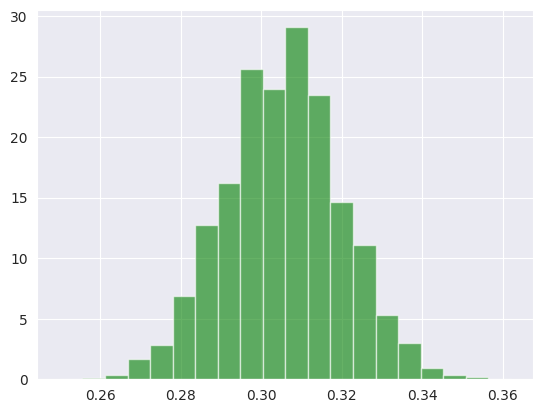

In [38]:
plt.hist(probability, bins=20, density=True, alpha=0.6, color='g')

In [221]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad

# Parametry dla rozkładów Beta
alpha1, beta1 = 20, 10  # Parametry dla rozkładu Beta dla pierwszego ramienia
alpha2, beta2 = 15, 15  # Parametry dla rozkładu Beta dla drugiego ramienia

# Zadana wartość delta
delta = 0.01

# Funkcja gęstości dla Beta(α1, β1)
def f1(y, alpha1, beta1):
    return beta.pdf(y, alpha1, beta1)

# Funkcja gęstości dla Beta(α2, β2)
def f2(y, x, alpha2, beta2):
    return beta.pdf(y + x, alpha2, beta2) if 0 <= y + x <= 1 else 0

# Funkcja gęstości dla różnicy Beta(α1, β1) - Beta(α2, β2)
def integrand_inner(y, x, alpha1, beta1, alpha2, beta2):
    return f1(y, alpha1, beta1) * f2(y, x, alpha2, beta2)

def integrand(x, alpha1, beta1, alpha2, beta2, delta):
    # Całkujemy gęstość rozkładu różnicy
    return quad(integrand_inner, -1, 1-x, args=(x, alpha1, beta1, alpha2, beta2))[0]

# Zmieniono -np.inf na -1, ponieważ różnica między dwoma wartościami z rozkładów Beta mieści się w przedziale [-1, 1]
beta_value, _ = quad(integrand, -1, delta, args=(alpha1, beta1, alpha2, beta2, delta))

print(f"Prawdopodobieństwo błędu II rodzaju (beta) przy delta = {delta}: {beta_value:.4f}")

Prawdopodobieństwo błędu II rodzaju (beta) przy delta = 0.01: 0.9212


In [215]:
0.977**(1/2)

0.9884331034521254

In [229]:
import scipy.stats as stats

def przedzial_ufnosci_beta(alpha, beta, confidence_level=0.95):
    """
    Funkcja wyznacza przedział ufności dla rozkładu beta.

    :param alpha: Parametr alfa rozkładu beta
    :param beta: Parametr beta rozkładu beta
    :param confidence_level: Poziom ufności (domyślnie 0.95)
    :return: Krotka z dolnym i górnym krańcem przedziału ufności
    """
    # Obliczanie dolnego i górnego krańca przedziału ufności
    lower_bound = stats.beta.ppf((1 - confidence_level) / 2, alpha, beta)
    upper_bound = stats.beta.ppf(1 - (1 - confidence_level) / 2, alpha, beta)
    
    return lower_bound, upper_bound

# Przykład użycia
alpha = 5
beta = 1
confidence_level = 0.95
przedzial = przedzial_ufnosci_beta(alpha, beta, confidence_level)
print(f"Przedział ufności: {przedzial}")


Przedział ufności: (0.47817624989501856, 0.9949492366205319)


In [238]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad

# Parametry rozkładów Beta
alpha1, beta1 = 2, 5
alpha2, beta2 = 3, 4
delta = 0

# Funkcja gęstości różnicy
def density_difference(z, alpha1, beta1, alpha2, beta2):
    def integrand(x):
        return beta.pdf(x, alpha1, beta1) * beta.pdf(x - z, alpha2, beta2)
    # Całkujemy funkcję od max(0, z) do min(1, 1+z) aby uwzględnić ograniczenia Beta
    return quad(integrand, max(0, z), min(1, 1 + z))[0]

# Całkowanie gęstości różnicy
def beta_probability(delta, alpha1, beta1, alpha2, beta2):
    # Całka w liczniku
    return quad(lambda z: density_difference(z, alpha1, beta1, alpha2, beta2), -1, delta)[0]

# Obliczenie prawdopodobieństwa
beta_estimate = beta_probability(delta, alpha1, beta1, alpha2, beta2)
print(f"Oszacowane prawdopodobieństwo beta: {beta_estimate}")


Oszacowane prawdopodobieństwo beta: 0.727272727272727


In [332]:
import numpy as np

def thompson_sampling_simulation(n_arms, true_probabilities, n_trials):
    successes = np.zeros(n_arms)
    failures = np.zeros(n_arms)

    for _ in range(n_trials):
        sampled_theta = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(n_arms)]
        chosen_arm = np.argmax(sampled_theta)
        
        reward = np.random.rand() < true_probabilities[chosen_arm]
        
        if reward:
            successes[chosen_arm] += 1
        else:
            failures[chosen_arm] += 1
    
    return successes, failures

def monte_carlo_simulation(n_simulations, n_arms, true_probabilities, n_trials):
    total_successes = np.zeros(n_arms)
    total_failures = np.zeros(n_arms)

    for _ in range(n_simulations):
        successes, failures = thompson_sampling_simulation(n_arms, true_probabilities, n_trials)
        total_successes += successes
        total_failures += failures

    avg_successes = total_successes / n_simulations
    avg_failures = total_failures / n_simulations
    
    return avg_successes, avg_failures

# Parametry symulacji
n_simulations = 1000  # liczba symulacji Monte Carlo
n_arms = 2  # liczba ramion
true_probabilities = [0.4, 0.6]  # prawdziwe prawdopodobieństwa sukcesu dla ramion
n_trials = 1000  # liczba prób w każdej symulacji

# Uruchomienie symulacji Monte Carlo
avg_successes, avg_failures = monte_carlo_simulation(n_simulations, n_arms, true_probabilities, n_trials)

# Wyświetlenie wyników
print("Średnia liczba sukcesów dla każdego ramienia:", avg_successes)
print("Średnia liczba porażek dla każdego ramienia:", avg_failures)


Średnia liczba sukcesów dla każdego ramienia: [ 16.189 575.562]
Średnia liczba porażek dla każdego ramienia: [ 24.515 383.734]


In [390]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad

def calculate_probability_better(alpha1, beta1, alpha2, beta2):
    def integrand(x):
        return beta.pdf(x, alpha1, beta1) * beta.cdf(x, alpha2, beta2)
    
    probability, _ = quad(integrand, 0, 1, epsabs=0.001)
    return probability

def thompson_sampling_with_exact_stopping(n_arms, true_probabilities, n_trials, stop_threshold=0.95):
    successes = np.zeros(n_arms)
    failures = np.zeros(n_arms)
    
    for t in range(n_trials):
        # Losowanie z rozkładu Beta dla każdego ramienia
        sampled_theta = [np.random.beta(successes[i] + 1, failures[i] + 1) for i in range(n_arms)]
        chosen_arm = np.argmax(sampled_theta)
        
        # Symulacja wyniku dla wybranego ramienia
        reward = np.random.rand() < true_probabilities[chosen_arm]
        
        # Aktualizacja liczby sukcesów lub porażek
        if reward:
            successes[chosen_arm] += 1
        else:
            failures[chosen_arm] += 1
        
        # Obliczanie prawdopodobieństwa, że wybrane ramię jest najlepsze
        alpha_chosen = successes[chosen_arm] + 1
        beta_chosen = failures[chosen_arm] + 1
        alpha_other = successes[1 - chosen_arm] + 1
        beta_other = failures[1 - chosen_arm] + 1
        
        prob_best_arm = calculate_probability_better(alpha_chosen, beta_chosen, alpha_other, beta_other)
        
        # Sprawdzanie warunku zatrzymania
        if prob_best_arm > stop_threshold:
            print(f"Algorytm zatrzymał się po {t+1} próbach.")
            break
    
    return successes, failures, t+1

# Parametry
n_arms = 2
true_probabilities = [0.45, 0.5]
n_trials = 1000
stop_threshold = 0.95  # Próg pewności zatrzymania

# Uruchomienie algorytmu z momentem zatrzymania
successes, failures, n_trials_taken = thompson_sampling_with_exact_stopping(n_arms, true_probabilities, n_trials, stop_threshold)

# Wyświetlenie wyników
print("Liczba sukcesów dla każdego ramienia:", successes)
print("Liczba porażek dla każdego ramienia:", failures)
mean_success_rate = successes / (successes + failures)
print("Średnie prawdopodobieństwo sukcesu dla każdego ramienia:", mean_success_rate)
print("Liczba prób do zatrzymania:", n_trials_taken)


Liczba sukcesów dla każdego ramienia: [251. 209.]
Liczba porażek dla każdego ramienia: [304. 236.]
Średnie prawdopodobieństwo sukcesu dla każdego ramienia: [0.45225225 0.46966292]
Liczba prób do zatrzymania: 1000


In [520]:
import numpy as np

def thompson_sampling_ab_test(alpha, beta, T_max, p_A, p_B, min_n=1):
    # Inicjalizacja priorytów dla ramion A i B
    alpha_A, beta_A = 1, 1
    alpha_B, beta_B = 1, 1
    
    for t in range(1, T_max + 1):
        # Próbkowanie wartości theta dla ramion A i B
        theta_A = np.random.beta(alpha_A, beta_A)
        theta_B = np.random.beta(alpha_B, beta_B)
        
        # Wybór ramienia
        if theta_A > theta_B:
            reward = np.random.binomial(1, p_A)
            alpha_A += reward
            beta_A += (1 - reward)
        else:
            reward = np.random.binomial(1, p_B)
            alpha_B += reward
            beta_B += (1 - reward)
        
        # Warunek stopu oparty na błędach I i II rodzaju
        if should_stop(alpha_A, beta_A, alpha_B, beta_B, alpha, beta) and  t>min_n:
            break
            
    # Zwróć najlepsze ramię
    return alpha_A, beta_A, alpha_B, beta_B, t
    # return 'A' if alpha_A / (alpha_A + beta_A) > alpha_B / (alpha_B + beta_B) else 'B'

def should_stop(alpha_A, beta_A, alpha_B, beta_B, alpha, beta):
    # Oblicz prawdopodobieństwa, że A > B i B > A
    p_A_better = calculate_posterior_probability(alpha_A, beta_A, alpha_B, beta_B)
    p_B_better = 1 - p_A_better
    
    # Sprawdź warunek stopu dla błędów I i II rodzaju
    return (p_A_better > 1 - alpha or p_B_better > 1 - beta)

def calculate_posterior_probability(alpha_A, beta_A, alpha_B, beta_B):
    # Przybliżenie Monte Carlo: szacowanie prawdopodobieństwa, że theta_A > theta_B
    samples = 1000
    theta_A_samples = np.random.beta(alpha_A, beta_A, samples)
    theta_B_samples = np.random.beta(alpha_B, beta_B, samples)
    return np.mean(theta_A_samples > theta_B_samples)


In [491]:
def integrand(x, alpha_A, beta_A, alpha_B, beta_B):
    return beta.pdf(x, alpha_A, beta_A) * beta.cdf(x, alpha_B, beta_B)

def calculate_posterior_probability_exact(alpha_A, beta_A, alpha_B, beta_B):
    probability, _ = quad(integrand, 0, 1, epsabs=0.001, args=(alpha_A, beta_A, alpha_B, beta_B))
    return probability  

In [492]:
stats.beta.std(1, 20)

0.0454029804402663

In [524]:
# Parametry symulacji
min_n = 1000
p_A = 0.45     # Prawdopodobieństwo sukcesu dla ramienia A
p_B = 0.5    # Prawdopodobieństwo sukcesu dla ramienia B

alpha = 0.05  # Poziom błędu I rodzaju
beta = 0.05    # Poziom błędu II rodzaju
T_max =  4000  # Maksymalna liczba prób

# Symulacja Monte Carlo
simulations = 1000
# results = {'A': 0, 'B': 0}
results = []
from tqdm import tqdm
from mpire import WorkerPool
with WorkerPool(4) as pool:
    results = pool.map(thompson_sampling_ab_test, [(alpha, beta, T_max, p_A, p_B, min_n)]*simulations, progress_bar=True)
# pool = mp.Pool(mp.cpu_count())
# pool.starmap(thompson_sampling_ab_test, [(alpha, beta, T_max, p_A, p_B)]*simulations)
# pool.close()


# for _ in tqdm(range(simulations)):
#     # best_arm = thompson_sampling_ab_test(alpha, beta, T_max, p_A, p_B)
#     alpha_A, beta_A, alpha_B, beta_B, t = thompson_sampling_ab_test(alpha, beta, T_max, p_A, p_B)
#     # results[best_arm] += 1
#     results.append((alpha_A, beta_A, alpha_B, beta_B, t))

df = pd.DataFrame(results, columns=['alpha_A', 'beta_A', 'alpha_B', 'beta_B', 't'])
df["pa"] = df["alpha_A"] / (df["alpha_A"] + df["beta_A"])
df["pb"] = df["alpha_B"] / (df["alpha_B"] + df["beta_B"])
df["best_arm"] = (df["pa"] < df["pb"]).astype(int)

# print(f"Ramię A zostało wybrane {results['A']} razy")
# print(f"Ramię B zostało wybrane {results['B']} razy")
df.describe()

100%|██████████| 1000/1000 [04:28<00:00,  2.93it/s]


,alpha_A,beta_A,alpha_B,beta_B,t,pa,pb,best_arm
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,150.747000,185.123000,523.695000,522.83000,1378.39500,0.414116,0.499954,0.992000
std,160.514429,184.523459,212.591159,221.31211,646.01787,0.066654,0.025472,0.089129
min,1.000000,9.000000,6.000000,16.00000,1001.00000,0.100000,0.266667,0.000000
25%,35.000000,50.750000,424.000000,415.00000,1001.00000,0.400000,0.490723,1.000000
50%,95.500000,123.000000,478.000000,472.00000,1021.00000,0.437500,0.501217,1.000000
75%,200.000000,245.000000,528.000000,543.00000,1508.00000,0.454315,0.512868,1.000000
max,1133.000000,1268.000000,1516.000000,1519.00000,4000.00000,0.492255,0.539405,1.000000


In [523]:
0.45*(1-0.45)

0.24750000000000003

In [510]:
df = pd.DataFrame(results, columns=['alpha_A', 'beta_A', 'alpha_B', 'beta_B', 't'])
df["pa"] = df["alpha_A"] / (df["alpha_A"] + df["beta_A"])
df["pb"] = df["alpha_B"] / (df["alpha_B"] + df["beta_B"])
df["best_arm"] = (df["pa"] < df["pb"]).astype(int)

# print(f"Ramię A zostało wybrane {results['A']} razy")
# print(f"Ramię B zostało wybrane {results['B']} razy")
df.describe()

,alpha_A,beta_A,alpha_B,beta_B,t,pa,pb,best_arm
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000
mean,79.540000,94.970000,118.690000,122.670000,411.870000,0.396074,0.467864,0.79000
std,85.165605,92.544224,110.470134,115.179356,368.868586,0.094368,0.100503,0.40936
min,1.000000,8.000000,2.000000,8.000000,101.000000,0.100000,0.200000,0.00000
25%,10.000000,19.000000,40.250000,39.750000,101.000000,0.333333,0.467408,1.00000
50%,42.000000,57.000000,69.000000,53.000000,181.000000,0.421836,0.500754,1.00000
75%,123.250000,124.000000,234.750000,253.500000,779.250000,0.467824,0.517923,1.00000
max,296.000000,327.000000,332.000000,331.000000,1000.000000,0.513889,0.598485,1.00000


In [505]:
pip install mpire

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.8/272.8 KB 2.0 MB/s eta 0:00:002.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [452]:
df.describe()

,alpha_A,beta_A,alpha_B,beta_B,t,pa,pb,best_arm
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,30.718000,13.751000,11.440000,11.416000,63.325000,0.717140,0.418504,1.0
std,33.839616,16.770935,16.492981,13.406367,72.257723,0.073635,0.114420,0.0
min,3.000000,1.000000,1.000000,2.000000,4.000000,0.500000,0.166667,1.0
25%,9.000000,3.000000,2.000000,4.000000,14.000000,0.666667,0.333333,1.0
50%,19.000000,8.000000,5.000000,6.500000,37.000000,0.712374,0.428571,1.0
75%,39.000000,17.250000,15.000000,14.000000,84.250000,0.766667,0.512821,1.0
max,298.000000,169.000000,190.000000,166.000000,612.000000,0.923077,0.661290,1.0


In [442]:
df.head()

,alpha_A,beta_A,alpha_B,beta_B,t,pa,pb,best_arm
0,77,49,13,16,151,0.611111,0.448276,1
1,1,2,3,1,3,0.333333,0.750000,0
2,1,2,3,1,3,0.333333,0.750000,0
3,9,2,5,5,17,0.818182,0.500000,1
4,150,85,50,43,324,0.638298,0.537634,1


In [398]:
%%timeit
calculate_posterior_probability_exact(1,1,1,1)

33.8 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Group A: Mean = -0.104, Variance = 0.817
Group B: Mean = 0.222, Variance = 0.900
T-statistic = 2.477
P-value = 0.014
Reject the null hypothesis: There is a significant difference between group A and group B.


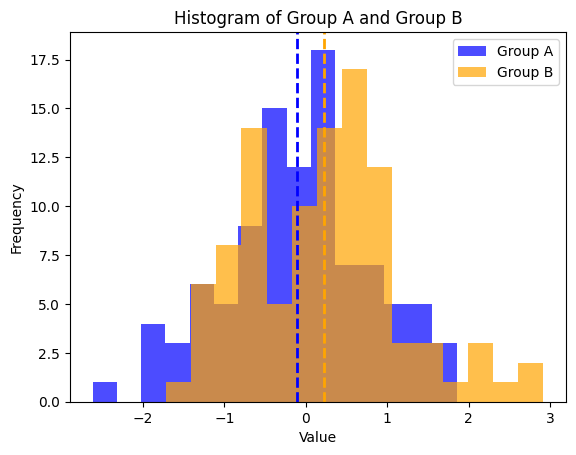

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
n_A = 100  # Sample size for group A
n_B = 100  # Sample size for group B
mu_A = 0.0  # Mean of group A
mu_B = 0.2  # Mean of group B (difference in means)
sigma = 1.0  # Equal standard deviation for both groups
alpha = 0.05  # Significance level

# Simulate data for both groups
np.random.seed(42)  # For reproducibility
data_A = np.random.normal(loc=mu_A, scale=sigma, size=n_A)
data_B = np.random.normal(loc=mu_B, scale=sigma, size=n_B)

# Perform two-sample t-test
t_statistic, p_value = stats.ttest_ind(data_B, data_A, equal_var=True)

# Output results
print(f"Group A: Mean = {np.mean(data_A):.3f}, Variance = {np.var(data_A):.3f}")
print(f"Group B: Mean = {np.mean(data_B):.3f}, Variance = {np.var(data_B):.3f}")
print(f"T-statistic = {t_statistic:.3f}")
print(f"P-value = {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group A and group B.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group A and group B.")

# Visualization
plt.hist(data_A, bins=15, alpha=0.7, label='Group A', color='blue')
plt.hist(data_B, bins=15, alpha=0.7, label='Group B', color='orange')
plt.axvline(np.mean(data_A), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(data_B), color='orange', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.title('Histogram of Group A and Group B')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Group A: Mean = -0.104, Variance = 0.817
Group B: Mean = 0.245, Variance = 3.602
T-statistic = 1.649
P-value = 0.101
Fail to reject the null hypothesis: No significant difference between group A and group B.


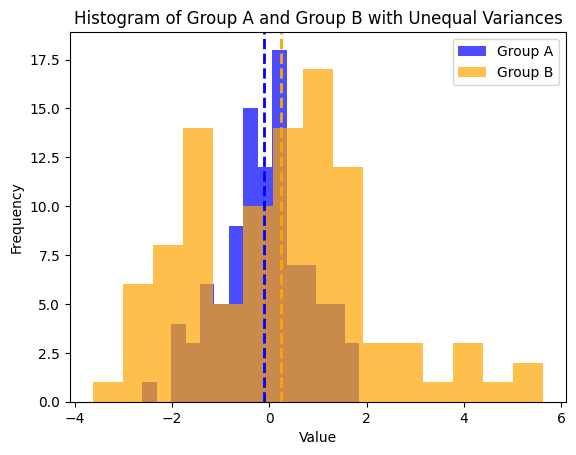

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
n_A = 100  # Sample size for group A
n_B = 100  # Sample size for group B
mu_A = 0.0  # Mean of group A
mu_B = 0.2  # Mean of group B (difference in means)
sigma_A = 1.0  # Standard deviation for group A
sigma_B = 2.0  # Standard deviation for group B (unequal variance)
alpha = 0.05  # Significance level

# Simulate data for both groups
np.random.seed(42)  # For reproducibility
data_A = np.random.normal(loc=mu_A, scale=sigma_A, size=n_A)
data_B = np.random.normal(loc=mu_B, scale=sigma_B, size=n_B)

# Perform Welch's t-test (does not assume equal variances)
t_statistic, p_value = stats.ttest_ind(data_B, data_A, equal_var=False)

# Output results
print(f"Group A: Mean = {np.mean(data_A):.3f}, Variance = {np.var(data_A):.3f}")
print(f"Group B: Mean = {np.mean(data_B):.3f}, Variance = {np.var(data_B):.3f}")
print(f"T-statistic = {t_statistic:.3f}")
print(f"P-value = {p_value:.3f}")

# Conclusion
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between group A and group B.")
else:
    print("Fail to reject the null hypothesis: No significant difference between group A and group B.")

# Visualization
plt.hist(data_A, bins=15, alpha=0.7, label='Group A', color='blue')
plt.hist(data_B, bins=15, alpha=0.7, label='Group B', color='orange')
plt.axvline(np.mean(data_A), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(np.mean(data_B), color='orange', linestyle='dashed', linewidth=2)
plt.legend(loc='upper right')
plt.title('Histogram of Group A and Group B with Unequal Variances')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


Final T-statistic = 1.111
Final P-value = 0.267
Data evaluated up to n = 6000


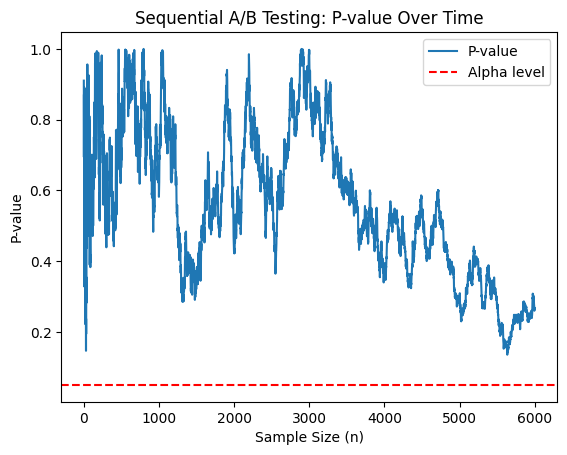

In [15]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters
n_total = 6000  # Total maximum sample size
mu_A = 0.45  # Mean of group A
mu_B = 0.50  # Mean of group B (effect size)
sigma_A = 1.0  # Standard deviation for group A
sigma_B = 1.0  # Standard deviation for group B
alpha = 0.05  # Significance level
beta = 0.05  # Desired Type II error rate (for power of 0.8)

# Compute stopping boundaries
A = (1 - beta) / alpha
B = beta / (1 - alpha)

# Simulate data generation
# np.random.seed(42)  # For reproducibility
data_A = np.random.normal(mu_A, sigma_A, n_total)
data_B = np.random.normal(mu_B, sigma_B, n_total)

# Sequential analysis
t_statistic_list = []
p_value_list = []
stop_point = None

for n in range(1, n_total + 1):
    # Evaluate the t-statistic and p-value sequentially
    t_statistic, p_value = stats.ttest_ind(data_B[:n], data_A[:n], equal_var=False)
    t_statistic_list.append(t_statistic)
    p_value_list.append(p_value)

    # Sequential decision rule (based on SPRT-like approach)
    if p_value <= alpha:
        stop_point = n
        print(f"Stopping early at n = {n}")
        break

# Final results
if stop_point is None:
    stop_point = n_total

print(f"Final T-statistic = {t_statistic_list[-1]:.3f}")
print(f"Final P-value = {p_value_list[-1]:.3f}")
print(f"Data evaluated up to n = {stop_point}")

# Visualization
plt.plot(range(1, stop_point + 1), p_value_list[:stop_point], label='P-value')
plt.axhline(y=alpha, color='r', linestyle='--', label='Alpha level')
plt.xlabel('Sample Size (n)')
plt.ylabel('P-value')
plt.title('Sequential A/B Testing: P-value Over Time')
plt.legend()
plt.show()


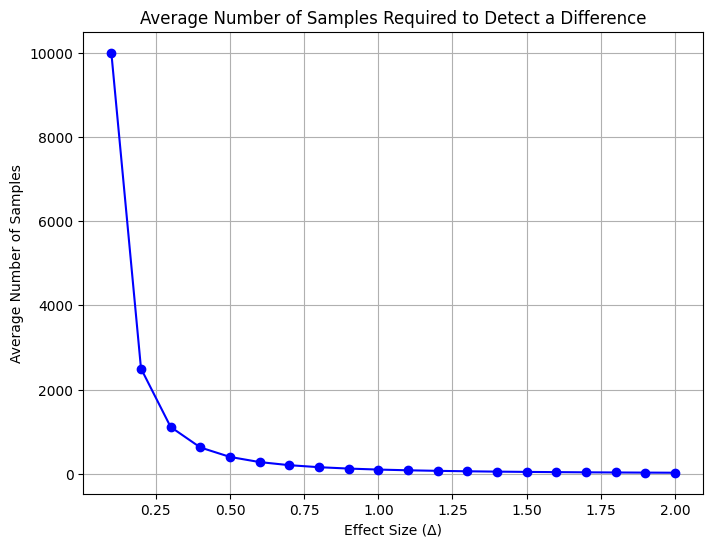

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Parametry symulacji
effect_sizes = np.linspace(0.1, 2.0, 20)  # Wielkości efektu (Delta)
average_samples = 1 / effect_sizes**2 * 100  # Przyjmujemy prostą funkcję odwrotną proporcjonalności

# Generowanie wykresu
plt.figure(figsize=(8, 6))
plt.plot(effect_sizes, average_samples, marker='o', linestyle='-', color='b')
plt.title('Average Number of Samples Required to Detect a Difference')
plt.xlabel('Effect Size (Δ)')
plt.ylabel('Average Number of Samples')
plt.grid(True)

# Zapisanie wykresu do pliku PDF
plt.savefig('normal_means.pdf')

plt.show()


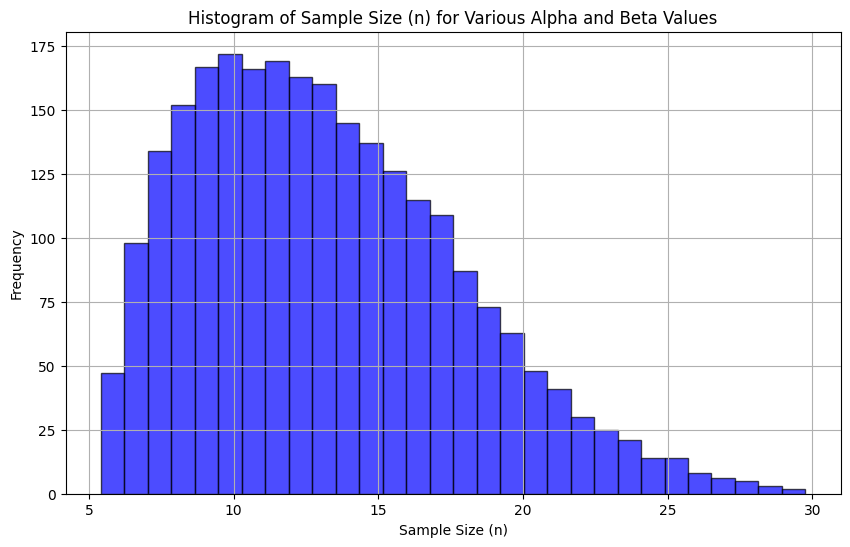

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Stałe
sigma = 1
delta = 1

# Przedziały dla alfa i beta
alpha_values = np.linspace(0.01, 0.1, 50)  # Zakres wartości alpha od 0.01 do 0.1
beta_values = np.linspace(0.1, 0.5, 50)  # Zakres wartości beta od 0.1 do 0.5

# Funkcja obliczająca n dla podanych alfa i beta
def calculate_n(alpha, beta, sigma, delta):
    Z_alpha = norm.ppf(1 - alpha / 2)
    Z_beta = norm.ppf(1 - beta)
    n = 2 * (Z_alpha + Z_beta)**2 * sigma**2 / delta**2
    return n

# Obliczenie n dla różnych wartości alfa i beta
n_values = [calculate_n(alpha, beta, sigma, delta) for alpha in alpha_values for beta in beta_values]

# Generowanie histogramu
plt.figure(figsize=(10, 6))
plt.hist(n_values, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Sample Size (n) for Various Alpha and Beta Values')
plt.xlabel('Sample Size (n)')
plt.ylabel('Frequency')
plt.grid(True)

# Zapisanie wykresu do pliku PDF
plt.savefig('sample_size_histogram.pdf')

plt.show()


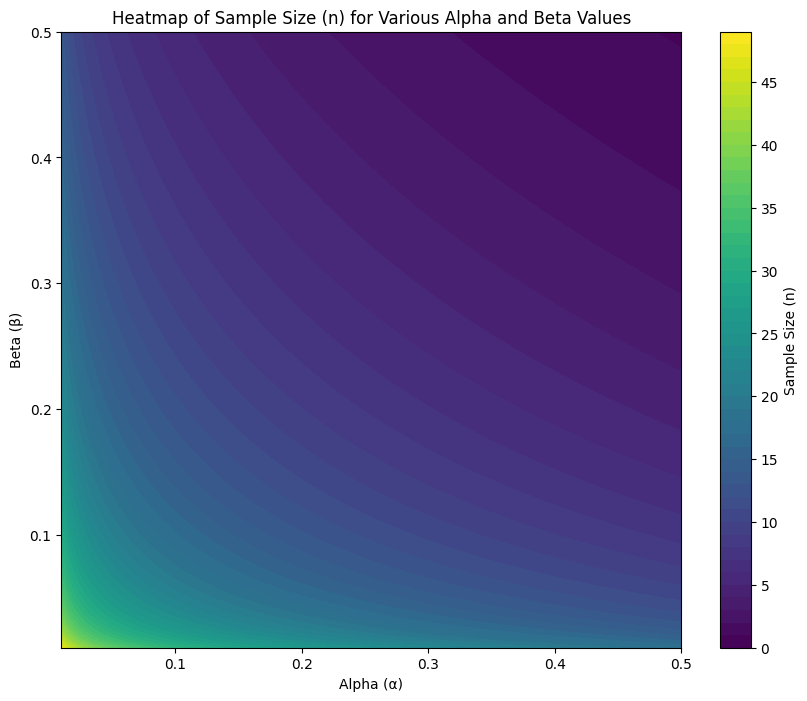

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Stałe
sigma = 1
delta = 1
# Przedziały dla alfa i beta
alpha_values = np.linspace(0.01, 0.5, 100)  # Zakres wartości alpha od 0.01 do 0.1
beta_values = np.linspace(0.01, 0.5, 100)  # Zakres wartości beta od 0.1 do 0.5

# Siatka wartości alfa i beta
alpha_grid, beta_grid = np.meshgrid(alpha_values, beta_values)

# Funkcja obliczająca n dla podanych alfa i beta
def calculate_n(alpha, beta, sigma, delta):
    Z_alpha = norm.ppf(1 - alpha / 2)
    Z_beta = norm.ppf(1 - beta)
    n = 2 * (Z_alpha + Z_beta)**2 * sigma**2 / delta**2
    return n

# Obliczenie n dla każdego punktu na siatce
n_grid = calculate_n(alpha_grid, beta_grid, sigma, delta)

# Generowanie mapy cieplnej (heatmap)
plt.figure(figsize=(10, 8))
plt.contourf(alpha_grid, beta_grid, n_grid, levels=50, cmap='viridis')
plt.colorbar(label='Sample Size (n)')
plt.title('Heatmap of Sample Size (n) for Various Alpha and Beta Values')
plt.xlabel('Alpha (α)')
plt.ylabel('Beta (β)')
plt.gca().invert_yaxis()  # Odwrócenie osi Y dla lepszej czytelności

# Zapisanie wykresu do pliku PDF
plt.savefig('sample_size_heatmap.pdf')
plt.gca().invert_yaxis()
plt.show()


In [30]:
 np.linspace(0.5, 0.01, 100)

array([0.5       , 0.49505051, 0.49010101, 0.48515152, 0.48020202,
       0.47525253, 0.47030303, 0.46535354, 0.46040404, 0.45545455,
       0.45050505, 0.44555556, 0.44060606, 0.43565657, 0.43070707,
       0.42575758, 0.42080808, 0.41585859, 0.41090909, 0.4059596 ,
       0.4010101 , 0.39606061, 0.39111111, 0.38616162, 0.38121212,
       0.37626263, 0.37131313, 0.36636364, 0.36141414, 0.35646465,
       0.35151515, 0.34656566, 0.34161616, 0.33666667, 0.33171717,
       0.32676768, 0.32181818, 0.31686869, 0.31191919, 0.3069697 ,
       0.3020202 , 0.29707071, 0.29212121, 0.28717172, 0.28222222,
       0.27727273, 0.27232323, 0.26737374, 0.26242424, 0.25747475,
       0.25252525, 0.24757576, 0.24262626, 0.23767677, 0.23272727,
       0.22777778, 0.22282828, 0.21787879, 0.21292929, 0.2079798 ,
       0.2030303 , 0.19808081, 0.19313131, 0.18818182, 0.18323232,
       0.17828283, 0.17333333, 0.16838384, 0.16343434, 0.15848485,
       0.15353535, 0.14858586, 0.14363636, 0.13868687, 0.13373

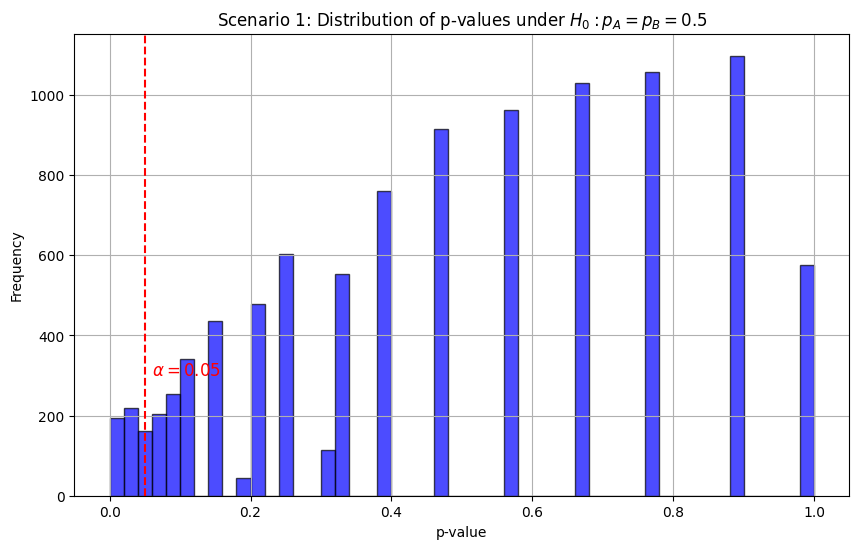

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Parameters
n_simulations = 10000  # Number of simulations
n_A = 100  # Sample size for group A
n_B = 100  # Sample size for group B
p_A = 0.5  # Success probability for group A
p_B = 0.5  # Success probability for group B

# Array to store p-values
p_values = []

# Simulation loop
for _ in range(n_simulations):
    # Simulate data for group A and group B
    successes_A = np.random.binomial(n_A, p_A)
    successes_B = np.random.binomial(n_B, p_B)
    
    # Perform Z-test for proportions
    successes = np.array([successes_A, successes_B])
    n_obs = np.array([n_A, n_B])
    z_stat, p_value = proportions_ztest(successes, n_obs)
    
    # Store the p-value
    p_values.append(p_value)

# Convert p_values list to numpy array for easier manipulation
p_values = np.array(p_values)

# Plot the distribution of p-values
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Scenario 1: Distribution of p-values under $H_0: p_A = p_B = 0.5$')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=1.5)
plt.text(0.06, 300, '$\\alpha = 0.05$', color='red', fontsize=12)
plt.grid(True)
plt.savefig('scenario1_pvalues.png')
plt.show()


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind

# Stałe
sigma = 1
delta = 1
sample_size_range = np.arange(5, 500, 5)  # Zakres próbek do przetestowania

# Parametry symulacji
alpha_values = np.linspace(0.01, 0.1, 10)  # Zakres wartości alpha
beta_values = np.linspace(0.1, 0.5, 10)    # Zakres wartości beta
num_simulations = 1000  # Liczba symulacji dla każdej kombinacji

# Funkcja do przeprowadzenia symulacji
def simulate_sample_size_detection(alpha, beta, sigma, delta, sample_sizes, num_simulations):
    target_power = 1 - beta
    results = []
    for n in sample_sizes:
        detections = 0
        for _ in range(num_simulations):
            # Generowanie danych dla dwóch grup
            group1 = np.random.normal(loc=0, scale=sigma, size=n)
            group2 = np.random.normal(loc=delta, scale=sigma, size=n)
            
            # Wykonanie testu t-Studenta
            t_stat, p_value = ttest_ind(group1, group2)
            
            # Sprawdzenie, czy wykryto różnicę
            if p_value < alpha:
                detections += 1
        
        # Obliczenie mocy testu
        power = detections / num_simulations
        results.append((n, power))
        
        # Zakończenie, jeśli moc osiągnie lub przekroczy zamierzony poziom
        if power >= target_power:
            break
    
    return results

# Siatka wartości alfa i beta
alpha_grid, beta_grid = np.meshgrid(alpha_values, beta_values)

# Symulacja dla każdej kombinacji alfa i beta
n_grid = np.zeros(alpha_grid.shape)
for i in range(len(alpha_values)):
    for j in range(len(beta_values)):
        alpha = alpha_grid[i, j]
        beta = beta_grid[i, j]
        results = simulate_sample_size_detection(alpha, beta, sigma, delta, sample_size_range, num_simulations)
        n_grid[i, j] = results[-1][0]  # Ostatnie n, które spełnia warunki

# Generowanie mapy cieplnej (heatmap)
plt.figure(figsize=(10, 8))
plt.contourf(alpha_grid, beta_grid, n_grid, levels=50, cmap='viridis')
plt.colorbar(label='Sample Size (n)')
plt.title('Simulated Heatmap of Sample Size (n) for Various Alpha and Beta Values')
plt.xlabel('Alpha (α)')
plt.ylabel('Beta (β)')
plt.gca().invert_yaxis()  # Odwrócenie osi Y dla lepszej czytelności

# Zapisanie wykresu do pliku PDF
plt.savefig('simulated_sample_size_heatmap.pdf')

plt.show()


KeyboardInterrupt: 

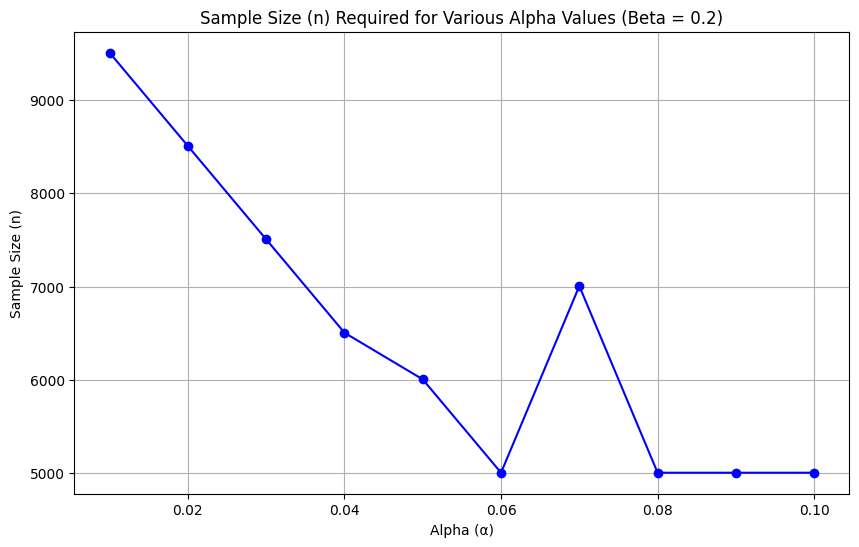

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, ttest_ind

# Stałe
sigma = 1
delta = 0.05
sample_size_range = np.arange(5, 10000, 500)  # Zakres próbek do przetestowania

# Parametry symulacji
alpha_values = np.linspace(0.01, 0.1, 10)  # Zakres wartości alpha
beta_value = 0.2  # Wybrana wartość beta
num_simulations = 100  # Liczba symulacji dla każdej kombinacji

# Funkcja do przeprowadzenia symulacji
def simulate_sample_size_detection(alpha, beta, sigma, delta, sample_sizes, num_simulations):
    target_power = 1 - beta
    results = []
    for n in sample_sizes:
        detections = 0
        for _ in range(num_simulations):
            # Generowanie danych dla dwóch grup
            group1 = np.random.normal(loc=0, scale=sigma, size=n)
            group2 = np.random.normal(loc=delta, scale=sigma, size=n)
            
            # Wykonanie testu t-Studenta
            t_stat, p_value = ttest_ind(group1, group2)
            
            # Sprawdzenie, czy wykryto różnicę
            if p_value < alpha:
                detections += 1
        
        # Obliczenie mocy testu
        power = detections / num_simulations
        results.append((n, power))
        
        # Zakończenie, jeśli moc osiągnie lub przekroczy zamierzony poziom
        if power >= target_power:
            break
    
    return results

# Symulacja dla każdego alfa w zakresie
n_values = []
for alpha in alpha_values:
    results = simulate_sample_size_detection(alpha, beta_value, sigma, delta, sample_size_range, num_simulations)
    n_values.append(results[-1][0])  # Ostatnie n, które spełnia warunki

# Generowanie wykresu
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, n_values, marker='o', linestyle='-', color='blue')
plt.title(f'Sample Size (n) Required for Various Alpha Values (Beta = {beta_value})')
plt.xlabel('Alpha (α)')
plt.ylabel('Sample Size (n)')
plt.grid(True)

# Zapisanie wykresu do pliku PDF
plt.savefig('sample_size_vs_alpha.pdf')

plt.show()


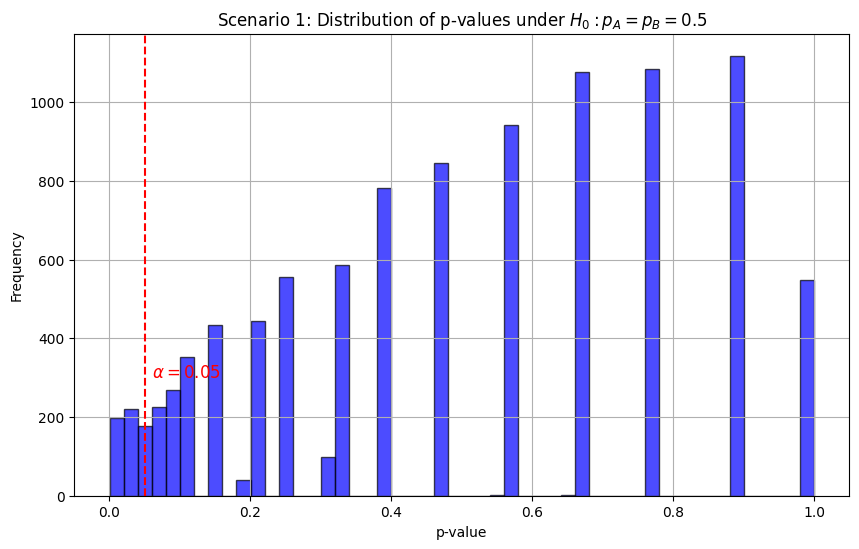

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest

# Parameters
n_simulations = 10000  # Number of simulations
n_A = 100  # Sample size for group A
n_B = 100  # Sample size for group B
p_A = 0.5  # Success probability for group A
p_B = 0.5  # Success probability for group B

# Array to store p-values
p_values = []

# Simulation loop
for _ in range(n_simulations):
    # Simulate data for group A and group B
    successes_A = np.random.binomial(n_A, p_A)
    successes_B = np.random.binomial(n_B, p_B)
    
    # Perform Z-test for proportions
    successes = np.array([successes_A, successes_B])
    n_obs = np.array([n_A, n_B])
    z_stat, p_value = proportions_ztest(successes, n_obs)
    
    # Store the p-value
    p_values.append(p_value)

# Convert p_values list to numpy array for easier manipulation
p_values = np.array(p_values)

# Plot the distribution of p-values
plt.figure(figsize=(10, 6))
plt.hist(p_values, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Scenario 1: Distribution of p-values under $H_0: p_A = p_B = 0.5$')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=1.5)
plt.text(0.06, 300, '$\\alpha = 0.05$', color='red', fontsize=12)
plt.grid(True)
plt.savefig('scenario1_pvalues.png')
plt.show()


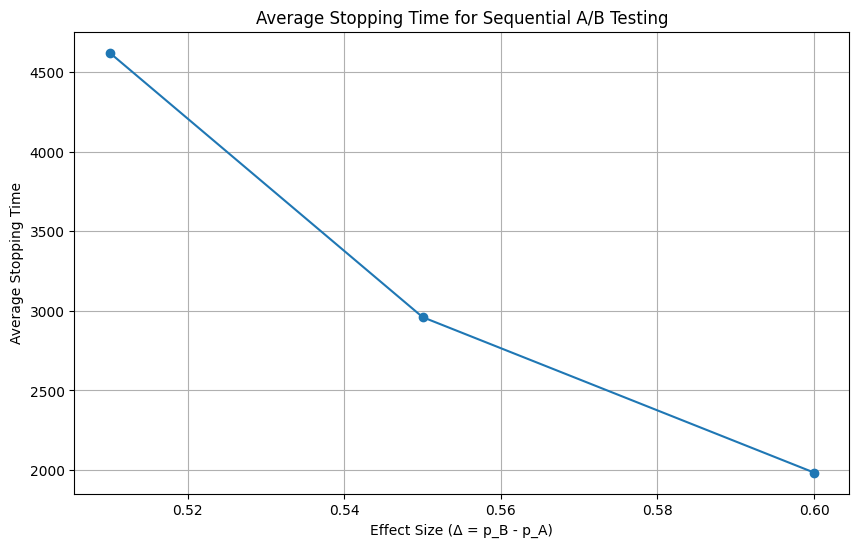

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []

    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 10

    return np.mean(stopping_times)

# Simulation parameters
p_A = 0.45  # Success probability in group A
p_B_values = [0.51, 0.55, 0.6]  # Different effect sizes (B-A)
n_initial = 5000  # Initial sample size for both groups
delta = 0.01  # Risk tolerance
alpha = 0.05  # Significance level
n_simulations = 100  # Number of simulations

# Run simulations for different effect sizes and plot the results
average_stopping_times = []
for p_B in p_B_values:
    avg_stopping_time = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
    average_stopping_times.append(avg_stopping_time)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(p_B_values, average_stopping_times, marker='o')
plt.xlabel('Effect Size (Δ = p_B - p_A)')
plt.ylabel('Average Stopping Time')
plt.title('Average Stopping Time for Sequential A/B Testing')
plt.grid(True)
plt.show()


In [134]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("viridis")
def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []

    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 1

    return np.mean(stopping_times)

# Simulation parameters
p_A_values = np.arange(0.05, 1, 0.05)  # Range of p_A values
p_B_values = np.arange(0.05, 1, 0.05)  # Range of p_B values
n_initial = 5000  # Initial sample size for both groups
delta = 0.3  # Risk tolerance
alpha = 0.05  # Significance level
n_simulations = 100 # Number of simulations

# Initialize a matrix to store average stopping times
avg_stopping_times_matrix = np.zeros((len(p_A_values), len(p_B_values)))

# Run simulations for all combinations of p_A and p_B
for i, p_A in enumerate(p_A_values):
    for j, p_B in enumerate(p_B_values):
        avg_stopping_time = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
        avg_stopping_times_matrix[i, j] = avg_stopping_time


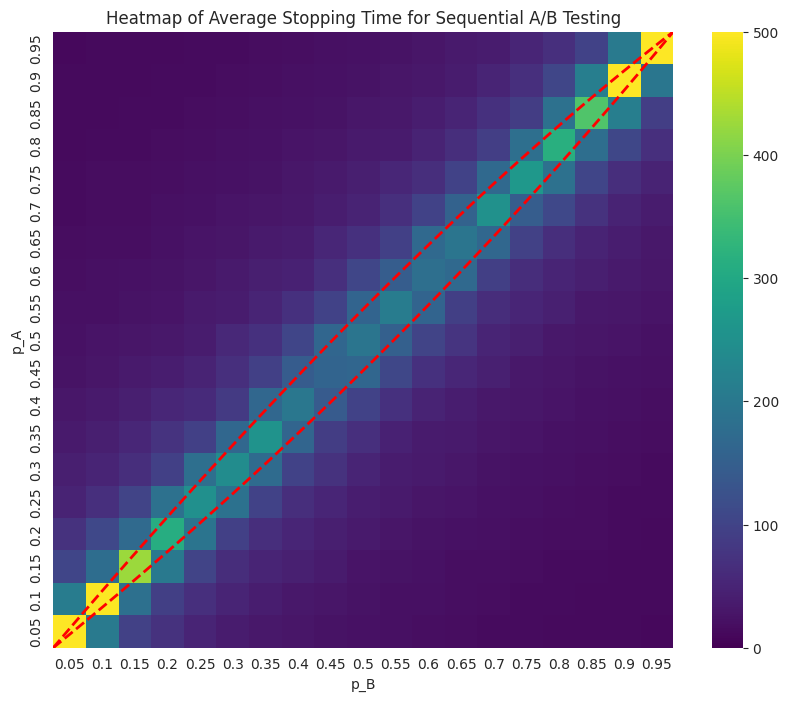

In [137]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(avg_stopping_times_matrix, xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=False, vmin=0, vmax=500)
plt.xlabel('p_B')
plt.ylabel('p_A')
plt.title('Heatmap of Average Stopping Time for Sequential A/B Testing')
plt.gca().invert_yaxis()
xs = np.linspace(0, 1, 101)
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2)
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)

plt.show()


In [132]:
xs = np.linspace(0, 1, 101)
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
max((2*xs-ys)-xs)

0.049953413177420636

In [404]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpire import WorkerPool    

sns.set_style("darkgrid")
sns.set_palette("viridis")

def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []
    type_1_errors = 0
    type_2_errors = 0
    error = 0

    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                if p_A >= p_B:  # When p_A equals p_B, rejecting H0 is a Type I error
                    error += 1
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                if p_A <= p_B:  # When p_A is not equal to p_B, accepting H0 is a Type II error
                    error += 1
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 1

    avg_stopping_time = np.mean(stopping_times)
    type_1_error_rate = type_1_errors / n_simulations
    type_2_error_rate = type_2_errors / n_simulations

    return avg_stopping_time, error

# Simulation parameters
p_A_values = np.arange(0.05, 1, 0.01)  # Range of p_A values
p_B_values = np.arange(0.05, 1, 0.01)  # Range of p_B values
n_initial = 2000  # Initial sample size for both groups
delta = 0.3  # Risk tolerance
alpha = 0.05  # Significance level
n_simulations = 100  # Number of simulations

# Initialize matrices to store results
avg_stopping_times_matrix = np.zeros((len(p_A_values), len(p_B_values)))
type_1_error_matrix = np.zeros((len(p_A_values), len(p_B_values)))
type_2_error_matrix = np.zeros((len(p_A_values), len(p_B_values)))
error_matrix = np.zeros((len(p_A_values), len(p_B_values)))
# Run simulations for all combinations of p_A and p_B



for i, p_A in enumerate(p_A_values):
    for j, p_B in enumerate(p_B_values):
        avg_stopping_time, error = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
        avg_stopping_times_matrix[i, j] = avg_stopping_time
        error_matrix[i, j] = error/n_simulations

# Plotting the heatmaps



KeyboardInterrupt: 

In [179]:
import pickle
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/avg_stopping_times_matrix.pkl", "wb") as f:
    pickle.dump(avg_stopping_times_matrix, f)
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/error_matrix.pkl", "wb") as f:
    pickle.dump(error_matrix, f)

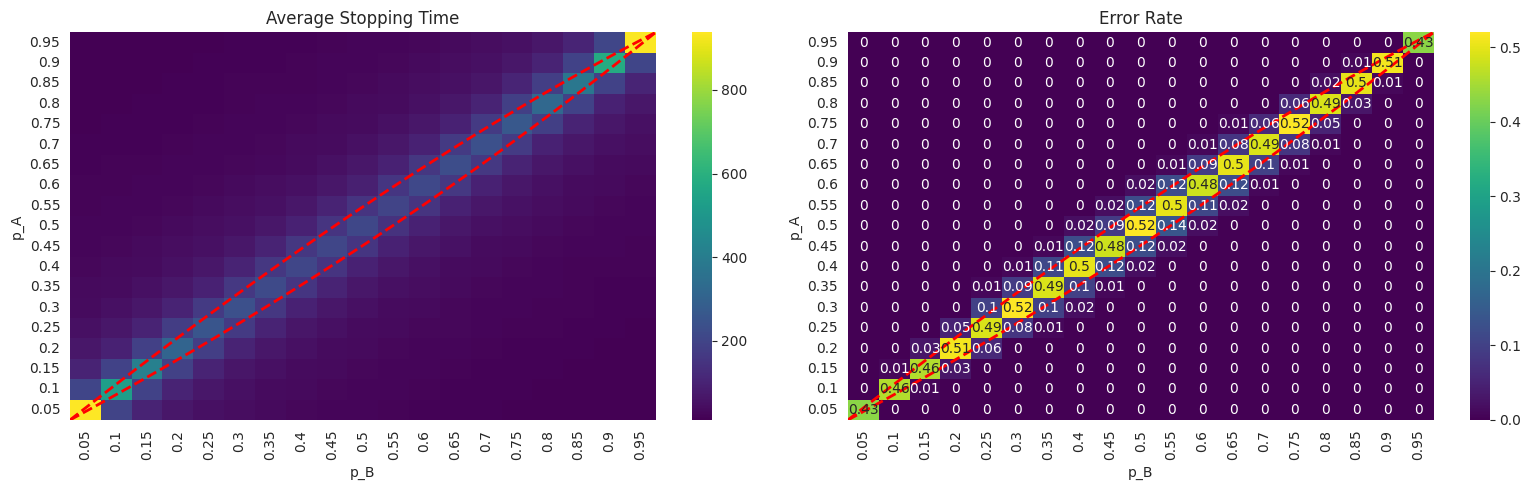

In [176]:
plt.figure(figsize=(16, 5))
sns.set_palette("viridis")

plt.subplot(1, 2, 1)
sns.heatmap(avg_stopping_times_matrix, xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=False)
plt.xlabel('p_B')
plt.ylabel('p_A')
plt.title('Average Stopping Time')
plt.gca().invert_yaxis()
xs = np.linspace(0, 1, 101)
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2)
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)



plt.subplot(1, 2, 2)
sns.heatmap(np.round(error_matrix, 2), xticklabels=np.round(p_B_values, 2), yticklabels=np.round(p_A_values, 2), cmap='viridis', annot=True)
plt.xlabel('p_B')
plt.ylabel('p_A')
plt.title('Error Rate')
plt.gca().invert_yaxis()
xs = np.linspace(0, 1, 101)
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
plt.plot(xs*19, ys*19, color='red', linestyle='dashed', linewidth=2)
plt.plot(xs*19, (2*xs-ys)*19, color='red', linestyle='dashed', linewidth=2)



plt.tight_layout()
plt.show()

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.set_palette("viridis")

def simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations):
    thresholds = {
        'upper': np.log((1 - alpha) / alpha),
        'lower': np.log(alpha / (1 - alpha))
    }
    
    stopping_times = []
    type_I_errors = 0
    type_II_errors = 0
    error = 0
    for _ in range(n_simulations):
        n_A, n_B = n_initial, n_initial
        x_A, x_B = np.random.binomial(1, p_A, n_A), np.random.binomial(1, p_B, n_B)
        log_likelihood_ratio = 0
        
        t = 1
        while True:
            p_hat_A = np.mean(x_A[:t])
            p_hat_B = np.mean(x_B[:t])

            log_likelihood_ratio = t * (p_hat_B - p_hat_A) * delta
            
            if log_likelihood_ratio > thresholds['upper']:
                stopping_times.append(t)
                if p_A >= p_B:  # H0 is true, but we rejected it
                    error += 1
                break
            elif log_likelihood_ratio < thresholds['lower']:
                stopping_times.append(t)
                if p_A <= p_B:  # H1 is true, but we accepted H0
                    error += 1
                break
            elif t >= len(x_A):
                stopping_times.append(t)
                break
            
            t += 1

    avg_stopping_time = np.mean(stopping_times)
    error = error / n_simulations
    return avg_stopping_time, error

# Simulation parameters
p_A = 0.5  # Fixed p_A value
p_B_values = np.arange(0.05, 1, 0.01)  # Range of p_B values
n_initial = 2000  # Initial sample size for both groups
delta = 0.1  # Risk tolerance
alpha = 0.05  # Significance level
n_simulations = 100  # Number of simulations

# Initialize lists to store results
avg_stopping_times = []
type_I_errors = []
type_II_errors = []
error_rates = []
# Run simulations for all values of p_B
for p_B in p_B_values:
    avg_stopping_time, error_rate = simulate_ab_test(p_A, p_B, n_initial, delta, alpha, n_simulations)
    avg_stopping_times.append(avg_stopping_time)
    error_rates.append(error_rate)


In [416]:
import scipy.stats as stats
import math

def calculate_sample_size_z_test(p_A, p_B, alpha, beta):
    # Calculate the standard normal quantiles for the significance level and power
    z_alpha = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test
    z_beta = stats.norm.ppf(1 - beta)
    
    # Calculate the pooled proportion
    p_pool = (p_A + p_B) / 2
    
    # Calculate the standard deviation under the null hypothesis
    stddev = math.sqrt(2 * p_pool * (1 - p_pool))
    
    # Calculate the effect size (the difference between proportions)
    effect_size = abs(p_B - p_A)
    # effect_size = 0.05
    # Calculate the required sample size per group
    n = ((z_alpha + z_beta) ** 2) * stddev**2 / effect_size**2
    
    return math.ceil(n)

def calculate_sample_size_chi_square(p_A, p_B, alpha, beta):
    # Calculate the chi-square critical value for the significance level
    chi_alpha = stats.chi2.ppf(1 - alpha, df=1)  # Degrees of freedom = 1
    
    # Calculate the standard normal quantile for the power (1 - beta)
    z_beta = stats.norm.ppf(1 - beta)
    
    # Calculate the pooled proportion
    p_pool = (p_A + p_B) / 2
    
    # Calculate the effect size (the difference between proportions)
    effect_size = abs(p_B - p_A)
    
    # Calculate the non-centrality parameter (NCP)
    ncp = (effect_size ** 2) / (p_pool * (1 - p_pool))
    
    # Calculate the required sample size per group
    n = (chi_alpha + z_beta ** 2) / ncp
    
    return math.ceil(n)


p_A = 0.5  # Probability of success in group A
alpha = 0.05  # Significance level (Type I error rate)
beta = 0.05  # Type II error rate (1 - power)
required_sample_sizes = []
for p_B in p_B_values:
    required_sample_size = calculate_sample_size_z_test(p_A, p_B, alpha, beta)
    required_sample_sizes.append(required_sample_size)
required_sample_sizes = np.array(required_sample_sizes)
required_sample_sizes

array([26, 28, 29, 31, 33, 35, 37, 39, 41, 44, 47, 50, 54, 57, 62, 66, 71,
       77, 83, 90, 98, 107, 117, 128, 141, 156, 174, 195, 219, 248, 283,
       326, 378, 445, 531, 644, 796, 1009, 1320, 1799, 2593, 4055, 7213,
       16237, 64968, 527128062292961170130371740696576, 64968, 16237,
       7213, 4055, 2593, 1799, 1320, 1009, 796, 644, 531, 445, 378, 326,
       283, 248, 219, 195, 174, 156, 141, 128, 117, 107, 98, 90, 83, 77,
       71, 66, 62, 57, 54, 50, 47, 44, 41, 39, 37, 35, 33, 31, 29, 28, 26,
       25, 23, 22, 21], dtype=object)

In [415]:
import statsmodels.stats.api as sms

# Parameters
baseline_rate = 0.5  # 50%
effect_size = sms.proportion_effectsize(0.5, 0.5)  # Detecting 2.5% increase
power = 0.95
alpha = 0.05

# Sample size per group
sample_size = sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=1)
sample_size = int(sample_size)
print(sample_size)

2590


In [194]:
# with open("/home/olek/studia/semestr_3_AM/master/creat_plots/avg_stopping_times_pa05.pkl", "wb") as f:
#     pickle.dump(avg_stopping_times, f)
# with open("/home/olek/studia/semestr_3_AM/master/creat_plots/error_rates_pa05.pkl", "wb") as f:
#     pickle.dump(error_rates, f)

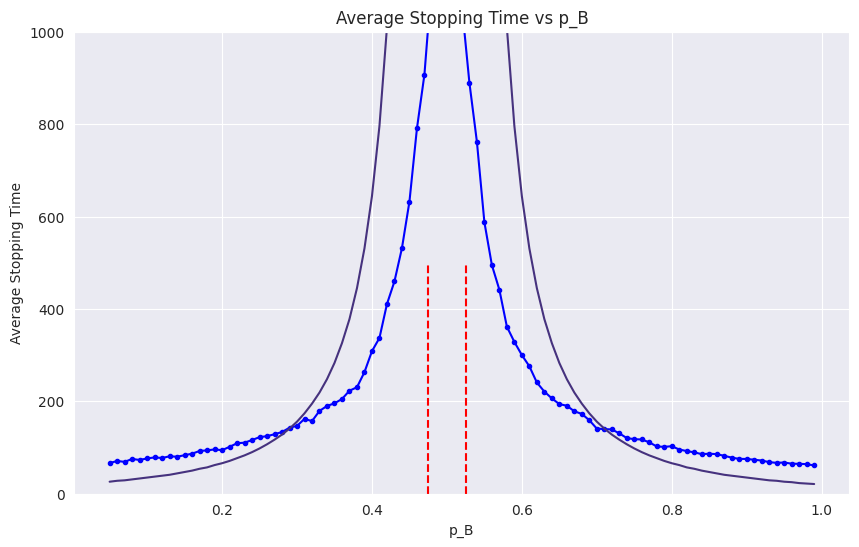

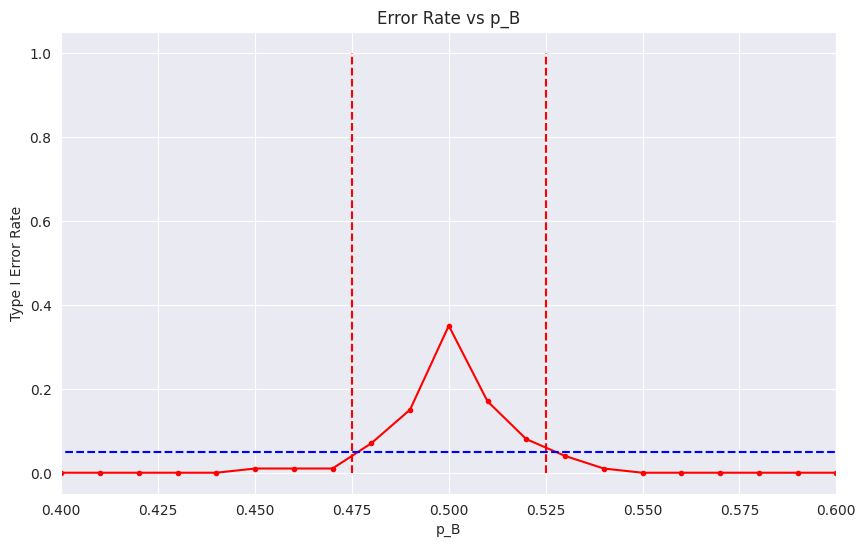

In [417]:
# Plotting the average stopping times
plt.figure(figsize=(10, 6))
plt.plot(p_B_values, avg_stopping_times, marker='.', linestyle='-', color='blue')
plt.title('Average Stopping Time vs p_B')
plt.xlabel('p_B')
plt.ylabel('Average Stopping Time')
plt.grid(True)
xs = 0.5
ys =  1 - 1/(1+xs*np.exp(-delta)/(1-xs))
plt.vlines(ys, 0, 500, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 500, color='red', linestyle='dashed', linewidth=1.5)
plt.plot(p_B_values, required_sample_sizes)
plt.ylim(0, 1000)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_B_values, error_rates, marker='.', linestyle='-', color='red')
plt.title('Error Rate vs p_B')
plt.xlabel('p_B')
plt.ylabel('Type I Error Rate')
plt.grid(True)
plt.vlines(ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.hlines(0.05, 0, 1, color='blue', linestyle='dashed', linewidth=1.5)
plt.xlim(0.4, 0.6)
plt.show()


In [425]:
import pandas as pd
import numpy as np

# Przygotowanie danych (dla przykładu)
df = pd.DataFrame(stopping_times_pa05).T
df.columns = p_B_values_pa05
data = df.describe()
data.loc["Error Rate"] = np.array(error_rates_pa05)
selected_data = data.round(2).iloc[1:, [1, 3, 5, 7, 8, 10, 11, 12]]

# Konwersja do formatu LaTeX z dodatkowymi opcjami
latex_table = selected_data.to_latex(
    index=True, 
    header=True, 
    column_format="l*{9}{c}",  # Automatyczne dodanie odpowiedniej liczby kolumn
    float_format="%.2f", 
    bold_rows=True,  # Pogrubienie wierszy z etykietami
    caption="Summary of Selected Data",  # Dodanie tytułu tabeli
    label="tab:selected_data_summary",  # Dodanie etykiety dla odwołań w tekście
    escape=False  # Wyłączenie automatycznego escapowania znaków (np. %)
)

# Opcjonalne dopracowanie kodu LaTeX ręcznie
latex_table = latex_table.replace("\\toprule", "\\hline \\hline")  # Zastąpienie toprule podwójną linią
latex_table = latex_table.replace("\\midrule", "\\hline")  # Zastąpienie midrule pojedynczą linią
latex_table = latex_table.replace("\\bottomrule", "\\hline \\hline")  # Zastąpienie bottomrule podwójną linią

# Dodanie specjalnego koloru wierszy nagłówków (jeśli masz zainstalowany pakiet xcolor)
latex_table = latex_table.replace("\\begin{tabular}", "\\rowcolors{2}{gray!25}{white}\\begin{tabular}")

# Dodanie formatowania nagłówka: pogrubienie i wyrównanie do środka
latex_table = latex_table.replace(
    "\\hline\n &", 
    "\\hline\n \\rowcolor{gray!50}\\textbf{Metric} &"
)
latex_table = latex_table.replace(
    "\\hline\n", 
    "\\hline\n \\rowcolor{gray!50}\\textbf{Metric} & \\textbf{B\\_2} & \\textbf{B\\_4} & \\textbf{B\\_6} & \\textbf{B\\_8} & \\textbf{B\\_9} & \\textbf{B\\_11} & \\textbf{B\\_12} & \\textbf{B\\_13} & \\textbf{B\\_14} \\\\\n\\hline\n"
)

# Dodanie linijki z formatowaniem i innymi pakietami do dokumentu LaTeX
header = r"""
\usepackage{booktabs}
\usepackage{caption}
\usepackage[table,xcdraw]{xcolor}
"""

# Wydrukowanie tabeli z dodatkowymi informacjami
print(header + latex_table)



\usepackage{booktabs}
\usepackage{caption}
\usepackage[table,xcdraw]{xcolor}
\begin{table}
\caption{Summary of Selected Data}
\label{tab:selected_data_summary}
\rowcolors{2}{gray!25}{white}\begin{tabular}{l*{9}{c}}
\hline \hline
 \rowcolor{gray!50}\textbf{Metric} & \textbf{B\_2} & \textbf{B\_4} & \textbf{B\_6} & \textbf{B\_8} & \textbf{B\_9} & \textbf{B\_11} & \textbf{B\_12} & \textbf{B\_13} & \textbf{B\_14} \\
\hline
 \rowcolor{gray!50}\textbf{Metric} & 0.100000 & 0.200000 & 0.300000 & 0.400000 & 0.450000 & 0.470000 & 0.480000 & 0.490000 \\
\hline
 \rowcolor{gray!50}\textbf{Metric} & \textbf{B\_2} & \textbf{B\_4} & \textbf{B\_6} & \textbf{B\_8} & \textbf{B\_9} & \textbf{B\_11} & \textbf{B\_12} & \textbf{B\_13} & \textbf{B\_14} \\
\hline
\textbf{mean} & 37.69 & 50.21 & 75.92 & 149.46 & 269.08 & 355.41 & 398.96 & 426.36 \\
\textbf{std} & 8.92 & 15.40 & 29.84 & 81.40 & 192.76 & 266.59 & 321.06 & 336.41 \\
\textbf{min} & 18.00 & 19.00 & 22.00 & 31.00 & 34.00 & 33.00 & 23.00 & 37.00 \\
\t

/tmp/ipykernel_703066/3177984361.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 100000)


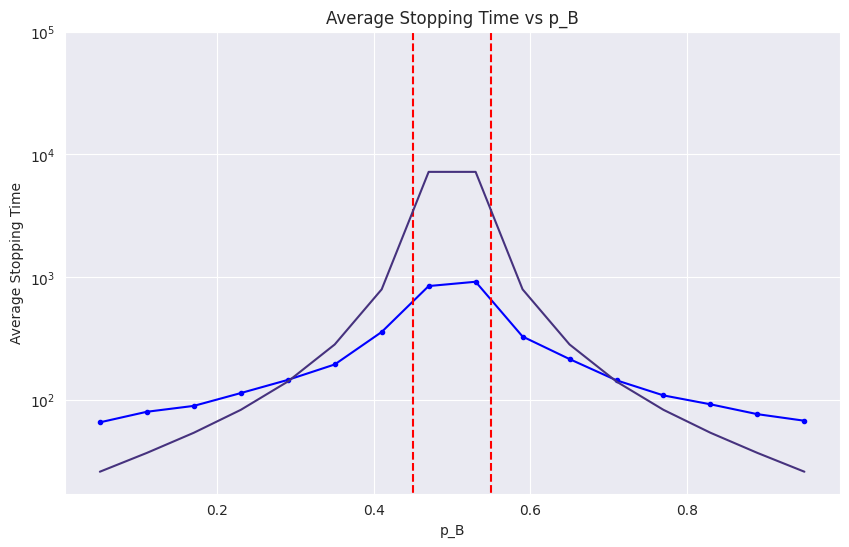

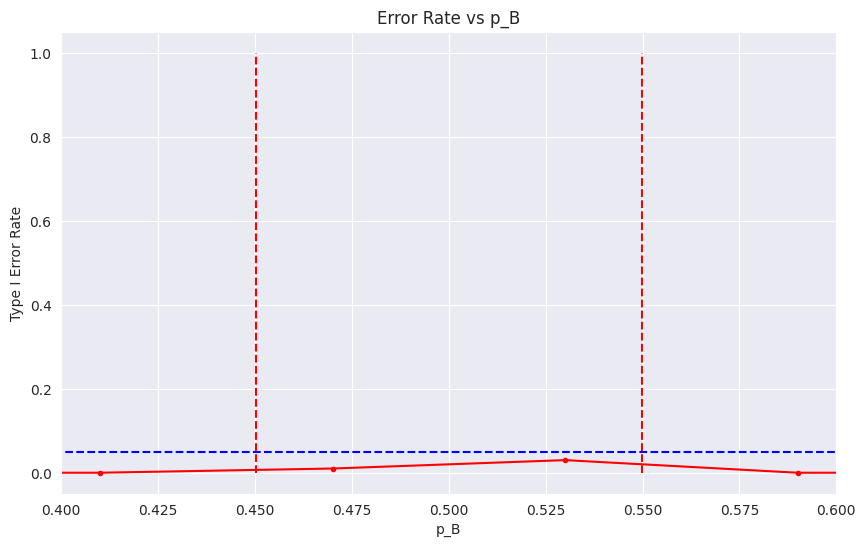

In [403]:
# Plotting the average stopping times
plt.figure(figsize=(10, 6))
plt.plot(p_B_values, avg_stopping_times, marker='.', linestyle='-', color='blue')
plt.title('Average Stopping Time vs p_B')
plt.xlabel('p_B')
plt.ylabel('Average Stopping Time')
plt.grid(True)
xs = 0.5
ys =  1 - 1/(1+xs*np.exp(-0.20)/(1-xs))
plt.vlines(ys, 0, 100000, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 100000, color='red', linestyle='dashed', linewidth=1.5)
plt.plot(p_B_values, required_sample_sizes)
plt.yscale('log')
plt.ylim(0, 100000)

plt.show()

plt.figure(figsize=(10, 6))
plt.plot(p_B_values, error_rates, marker='.', linestyle='-', color='red')
plt.title('Error Rate vs p_B')
plt.xlabel('p_B')
plt.ylabel('Type I Error Rate')
plt.grid(True)
plt.vlines(ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.vlines(2*xs - ys, 0, 1, color='red', linestyle='dashed', linewidth=1.5)
plt.hlines(0.05, 0, 1, color='blue', linestyle='dashed', linewidth=1.5)
plt.xlim(0.4, 0.6)
plt.show()


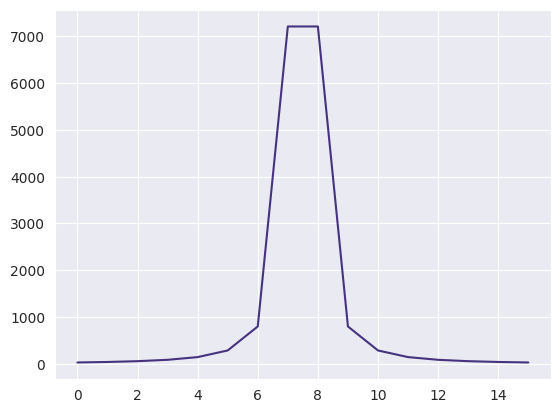

In [402]:
import scipy.stats as stats
import math

def calculate_sample_size_z_test(p_A, p_B, alpha, beta):
    # Calculate the standard normal quantiles for the significance level and power
    z_alpha = stats.norm.ppf(1 - alpha / 2)  # Two-tailed test
    z_beta = stats.norm.ppf(1 - beta)
    
    # Calculate the pooled proportion
    p_pool = (p_A + p_B) / 2
    
    # Calculate the standard deviation under the null hypothesis
    stddev = math.sqrt(2 * p_pool * (1 - p_pool))
    
    # Calculate the effect size (the difference between proportions)
    effect_size = abs(p_B - p_A)
    # effect_size = 0.05
    # Calculate the required sample size per group
    n = ((z_alpha + z_beta) ** 2) * stddev**2 / effect_size**2
    
    return math.ceil(n)


def calculate_sample_size(p_A, p_B, alpha, beta):
    # Calculate the standard normal quantiles for the significance level and power
    z_alpha = stats.norm.ppf(1 - alpha / 2)
    z_beta = stats.norm.ppf(1 - beta)
    
    # Calculate the pooled proportion
    p_pool = (p_A + p_B) / 2
    
    # Calculate the standard deviation for each group
    stddev_A = math.sqrt(p_pool * (1 - p_pool) / p_A)
    stddev_B = math.sqrt(p_pool * (1 - p_pool) / p_B)
    
    # Calculate the effect size
    effect_size = abs(p_B - p_A)
    
    # Calculate the required sample size per group
    n = ((z_alpha + z_beta) ** 2) * (stddev_A + stddev_B) / effect_size**2
    
    return math.ceil(n) 
# Parameters
p_A = 0.5  # Probability of success in group A
p_B = 0.45  # Probability of success in group B (effect size)
alpha = 0.05  # Significance level (Type I error rate)
beta = 0.05  # Type II error rate (1 - power)
required_sample_sizes = []
for p_B in p_B_values:
    required_sample_size = calculate_sample_size_z_test(p_A, p_B, alpha, beta)
    required_sample_sizes.append(required_sample_size)
required_sample_sizes = np.array(required_sample_sizes)

# required_sample_sizes[p_B_values.round(2)==0.5] = np.NaN
plt.plot(required_sample_sizes)

In [421]:
calculate_sample_size_z_test(0.5, 0.475, 0.05, 0.05)

10390

In [348]:
calculate_sample_size_z_test(1, 0, 0.05, 0.05)

7

In [368]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestIndPower

# Example data for two groups
group1 = np.random.normal(1, 0.01, 3)
group2 = np.random.normal(0, 0.01, 3)

# group1 = [0]*3
# group2 = [1]*3
t_statistic, p_value = stats.ttest_ind(group1, group2)

# Calculate effect size (Cohen's d)
mean1 = np.mean(group1)
mean2 = np.mean(group2)
std1 = np.std(group1, ddof=1)
std2 = np.std(group2, ddof=1)

pooled_std = np.sqrt(((len(group1) - 1) * std1**2 + (len(group2) - 1) * std2**2) / (len(group1) + len(group2) - 2))
effect_size = (mean1 - mean2) / pooled_std

# Calculate the power of the test
alpha = 0.05
power_analysis = TTestIndPower()
power = power_analysis.solve_power(effect_size=effect_size, nobs1=len(group1), alpha=alpha, ratio=len(group2)/len(group1), alternative='two-sided')

# Display the results
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Effect size (Cohen's d): {effect_size:.4f}")
print(f"Power of the test: {power:.4f}")

# Interpretation
if p_value < alpha:
    print("We reject the null hypothesis. There is a statistically significant difference between the two groups.")
else:
    print("We fail to reject the null hypothesis. There is no statistically significant difference between the two groups.")


T-statistic: 108.2628
P-value: 0.0000
Effect size (Cohen's d): 88.3962
Power of the test: 1.0000
We reject the null hypothesis. There is a statistically significant difference between the two groups.


In [ ]:
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/stopping_times_pa05.pkl", "rb") as f:
    stopping_times_pa05 = pickle.load(f)

In [373]:
with open("/home/olek/studia/semestr_3_AM/master/creat_plots/stopping_times_pa05.pkl", "rb") as f:
    stopping_times_pa05 = pickle.load(f)

In [374]:
import pandas as pd
pd.DataFrame(stopping_times_pa05)  

,0
0,28
1,43
2,38
3,32
4,55
...,...
1995,35
1996,38
1997,38
1998,42
